In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '"C:\Users\mashe\Downloads\test_2umaH9m.csv","C:\Users\mashe\Downloads\train_LZdllcl.csv"'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: '\'"C:\\Users\\mashe\\Downloads\\test_2umaH9m.csv","C:\\Users\\mashe\\Downloads\\train_LZdllcl.csv"\''
C:\Users\mashe


In [3]:
hrtrain=pd.read_csv(r'C:\Users\mashe\Downloads\train_LZdllcl.csv')
hrtest=pd.read_csv(r'C:\Users\mashe\Downloads\test_2umaH9m.csv')

In [4]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [6]:
print(hrtrain.avg_training_score.skew())

0.45190808551707995


In [7]:
print(hrtrain.avg_training_score.kurt())

-1.049649301934108


<Axes: ylabel='Frequency'>

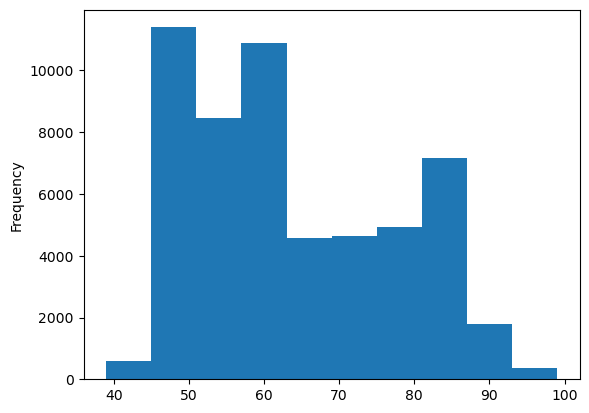

In [8]:
#histogram,boxplot,density curve for avg_training_score
hrtrain.avg_training_score.plot(kind="hist")

<Axes: >

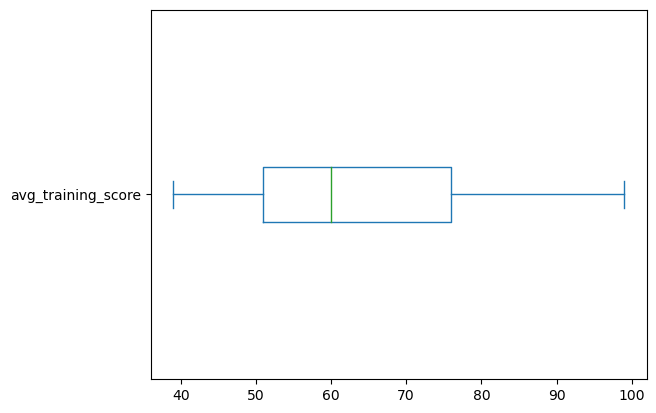

In [9]:
hrtrain.avg_training_score.plot(kind="box",vert=False)

<Axes: ylabel='Density'>

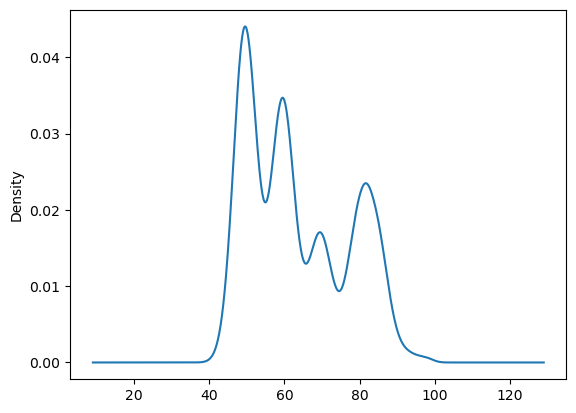

In [10]:
hrtrain.avg_training_score.plot(kind="density"
                               )

In [11]:
#relationship between Age and avg_training_score
hrtrain[['age','avg_training_score']].cov()

,age,avg_training_score
age,58.678192,-4.955455
avg_training_score,-4.955455,178.798603


In [12]:
hrtrain[['age','avg_training_score']].corr()

,age,avg_training_score
age,1.00000,-0.04838
avg_training_score,-0.04838,1.00000


<Axes: xlabel='age', ylabel='avg_training_score'>

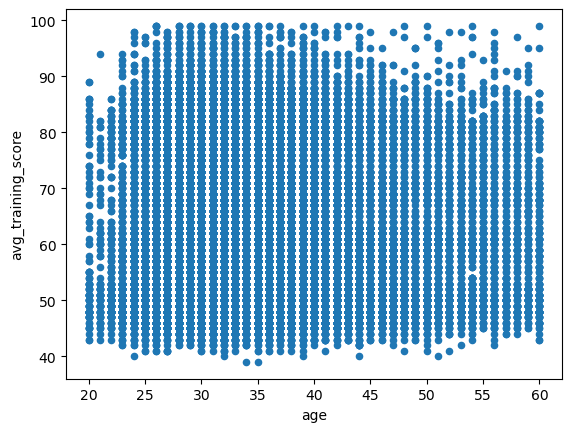

In [13]:
hrtrain.plot(x='age',y='avg_training_score',kind='scatter')

In [14]:
#categorial data - frequency counts,cross tabulation
# cross tabulation shows frequency of two categorical variables

In [15]:
#how many types of educations are there?
hrtrain.education.value_counts(dropna=False)

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [16]:
#frequency counts of gender
hrtrain.gender.value_counts(dropna=False)

gender
m    38496
f    16312
Name: count, dtype: int64

In [17]:
#frequency counts of department
hrtrain.department.value_counts(dropna=False)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [18]:
#departmentwise gender
pd.crosstab(hrtrain.department,hrtrain.gender)

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


In [19]:
#departmentwise education
pd.crosstab(hrtrain.department,hrtrain.education)

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,3978,0,1037
Finance,1895,106,499
HR,1525,128,733
Legal,814,65,156
Operations,7781,176,3165
Procurement,4393,129,2544
R&D,542,0,429
Sales & Marketing,11099,0,4166
Technology,4642,201,2196


In [20]:
#frequency count of previous_year_rating
hrtrain.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [21]:
#cross tabulation of previous_year_rating and gender
pd.crosstab(hrtrain.previous_year_rating,hrtrain.gender)

gender,f,m
previous_year_rating,,
1.0,1661,4562
2.0,1221,3004
3.0,5633,12985
4.0,3037,6840
5.0,3602,8139


In [22]:
#who performed well in terms of avg_training_score,male or female?
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()
#left-side of groupby should be numerical variable
#right-side(within ()) of groupby should be non-numeric variable
#stat function like mean,standard deviation,sum... must be specified

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [23]:
#median age of male and female employees
hrtrain.age.groupby(hrtrain.gender).median()

gender
f    33.0
m    33.0
Name: age, dtype: float64

In [24]:
#what is Average avg_training_score pf different previous_year_rating
hrtrain.avg_training_score.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.197819
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [25]:
#what is Average length_of_service pf different previous_year_rating?
hrtrain.length_of_service.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    6.223686
2.0    6.241893
3.0    6.309324
4.0    6.193986
5.0    6.269142
Name: length_of_service, dtype: float64

In [26]:
#dependent variable - is_promoted (0- no,1-yes)
hrtrain.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [27]:
#what is Average avg_training_score of is_promoted 0&1
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [28]:
#what is Average length_of_service of is_promoted 0&1
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [29]:
#2 categorical variables in groupby function
#what is Average avg_training_score of is_promoted 0&1 and gender
hrtrain.avg_training_score.groupby([hrtrain.is_promoted,hrtrain.gender]).mean()

is_promoted  gender
0            f         63.089256
             m         62.461963
1            f         71.991820
             m         71.019681
Name: avg_training_score, dtype: float64

In [30]:
#what is Average length_of_service of gender and is_promoted?
hrtrain.length_of_service.groupby([hrtrain.is_promoted,hrtrain.gender]).mean()

is_promoted  gender
0            f         6.011654
             m         5.823771
1            f         5.820041
             m         5.668853
Name: length_of_service, dtype: float64

In [31]:
#what is Average length_of_service of awards_won and is_promoted?
hrtrain.length_of_service.groupby([hrtrain.is_promoted,hrtrain['awards_won?']]).mean()

is_promoted  awards_won?
0            0              5.896963
             1              4.658228
1            0              5.828912
             1              4.889088
Name: length_of_service, dtype: float64

In [32]:
#what is the Average no_of_trainings for different recruitment channels?
hrtrain.no_of_trainings.groupby(hrtrain.recruitment_channel).median()

recruitment_channel
other       1.0
referred    1.0
sourcing    1.0
Name: no_of_trainings, dtype: float64

In [33]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [34]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender,normalize=True)

gender,f,m
is_promoted,,
0,0.270855,0.643975
1,0.026766,0.058404


In [35]:
#proportion of males and females promoted to respective population
print("the percentage of females promoted",np.round((1467/16312)*100))
print("the percentage of males promoted",np.round((3201/38496)*100))

the percentage of females promoted 9.0
the percentage of males promoted 8.0


In [36]:
#proportions of promotions in departments
np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,normalize='index'),decimals=2)*100

is_promoted,0,1
department,,
Analytics,90.0,10.0
Finance,92.0,8.0
HR,94.0,6.0
Legal,95.0,5.0
Operations,91.0,9.0
Procurement,90.0,10.0
R&D,93.0,7.0
Sales & Marketing,93.0,7.0
Technology,89.0,11.0


<Axes: xlabel='department'>

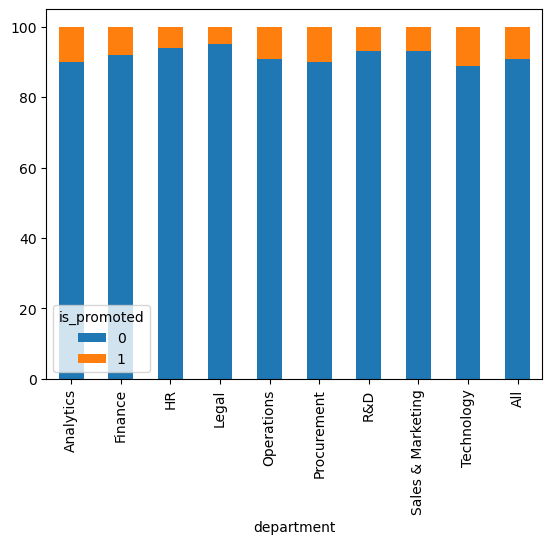

In [37]:
(np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,normalize='index'),decimals=2)*100).plot(kind='bar',stacked=True)

In [38]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [39]:
pd.cut(np.array(hrtrain.avg_training_score),3,labels=['bad','average','good']).value_counts()

bad        25868
average    18416
good       10524
Name: count, dtype: int64

In [41]:
bins=[29,39,49,59,69,79,89,99]
hrtrain['bins']=pd.cut(hrtrain.avg_training_score,bins)

In [44]:
hrtrain.bins.value_counts().sort_index()

bins
(29, 39]        2
(39, 49]     9285
(49, 59]    16581
(59, 69]    11073
(69, 79]     7343
(79, 89]     9760
(89, 99]      764
Name: count, dtype: int64

In [45]:
bins=[0,5,10,15,20,25,30,35,40]
hrtrain['servicebins']=pd.cut(hrtrain.length_of_service,bins)

In [46]:
hrtrain.servicebins.value_counts().sort_index()

servicebins
(0, 5]      30932
(5, 10]     17990
(10, 15]     3539
(15, 20]     1829
(20, 25]      325
(25, 30]      149
(30, 35]       43
(35, 40]        1
Name: count, dtype: int64

In [47]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'bins', 'servicebins'],
      dtype='object')

In [49]:
hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].cov()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,0.371203,-0.379329,-0.148832,0.346378
age,-0.379329,58.678192,21.468711,-4.955455
length_of_service,-0.148832,21.468711,18.191028,-2.174143
avg_training_score,0.346378,-4.955455,-2.174143,178.798603


In [50]:
hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517
age,-0.081278,1.000000,0.657111,-0.048380
length_of_service,-0.057275,0.657111,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,-0.038122,1.000000


In [51]:
import seaborn as sns

<Axes: >

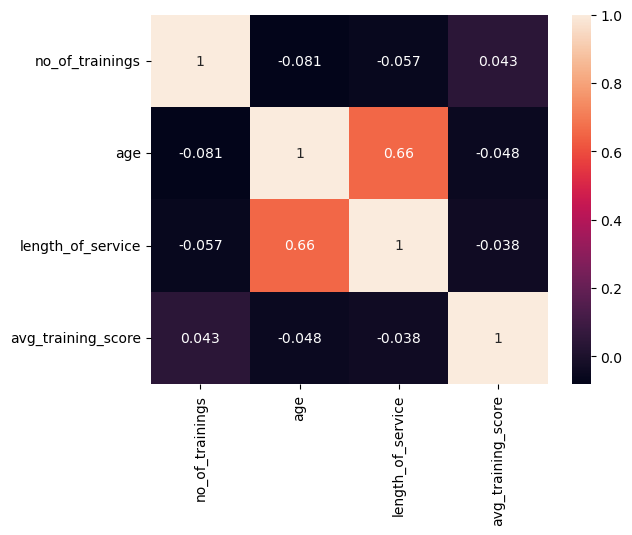

In [52]:
sns.heatmap(hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].corr(),annot=True)